In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3419_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4176_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3370_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1255_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/660_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/484_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/4221_right.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2396_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/543_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/3017_left.jpg
/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1482_left.jpg
/kaggle/input/ocular-disease-recognit

In [2]:
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv("/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [4]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0
    
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [5]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values

left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(300,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(300,random_state=42).values

In [6]:
left_cataract[:10], left_normal[:10]

(array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
        '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
        '465_left.jpg', '477_left.jpg'], dtype=object),
 array(['3332_left.jpg', '4059_left.jpg', '69_left.jpg', '2415_left.jpg',
        '4176_left.jpg', '2711_left.jpg', '4614_left.jpg', '3174_left.jpg',
        '2862_left.jpg', '2424_left.jpg'], dtype=object))

In [7]:
cataract = np.concatenate((left_cataract,right_cataract), axis=0)
normal = np.concatenate((left_normal,right_normal), axis=0)

In [8]:
len(cataract), len(normal)

(594, 600)

PYTORCH!!!

In [9]:
import torch
from torch import nn
from torch.utils.data import Dataset, ConcatDataset, TensorDataset, DataLoader

In [10]:
class CustomDataset(Dataset):
  def __init__(self, image_category, label, dataset_dir, image_size=224):
    self.image_category = image_category
    self.label = label
    self.dataset_dir = dataset_dir
    self.image_size = image_size
    self.data = self.create_dataset()

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    img, label = self.data[idx]
    return img, label

  def create_dataset(self):
    dataset = []
    dataset_label = []
    for img in tqdm(self.image_category):
      image_path = os.path.join(self.dataset_dir, img)
      try:
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        # Convert BGR to RGB 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (self.image_size, self.image_size))
      except:
        continue

      dataset.append([np.array(image), np.array(self.label)])
    random.shuffle(dataset)
    return dataset

In [11]:
dataset_cataract = CustomDataset(image_category = cataract,
                                 label = 1,
                                 dataset_dir = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/",
                                 image_size = 224)

dataset_normal = CustomDataset(normal, 0, "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/", 224)

  0%|          | 0/594 [00:00<?, ?it/s]

[ WARN:0@5.560] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2102_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.841] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2231_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6.968] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2244_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.010] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/2251_left.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10.235] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1456_right.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10.877] global load

  0%|          | 0/600 [00:00<?, ?it/s]

In [12]:
dataset = ConcatDataset([dataset_cataract, dataset_normal])

print("Combined dataset length:", len(dataset))

Combined dataset length: 1188


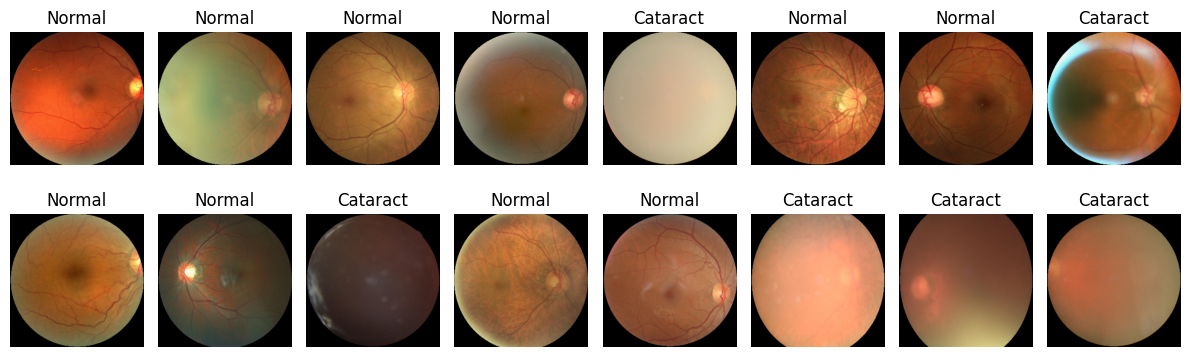

In [13]:
plt.figure(figsize=(12, 4))
rows, cols = 2, 8
for i in range(1, rows*cols + 1):
  sample = random.choice(range(len(dataset)))
  image = dataset[sample][0]
  category = dataset[sample][1]

  label = "Normal" if category == 0 else "Cataract"

  plt.subplot(rows, cols, i)
  plt.imshow(image)
  plt.title(label)
  plt.axis(False);
plt.tight_layout()

In [14]:
X = np.array([i[0] for i in dataset]).reshape(-1, 224, 224, 3)
y = np.array([i[1] for i in dataset])

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

X[0], y[:10]

(tensor([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]),
 tensor([1, 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

len(X_train), len(X_test), y_train[:10]

(950, 238, tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 1]))

In [16]:
X_train, X_test = X_train.permute(0, 3, 1, 2), X_test.permute(0, 3, 1, 2)

In [17]:
BATCH_SIZE = 32

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = False)      # Shuffle false cuz already shuffled using sklearn->train_test_spilt

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(30, 8)